# Getting started with OpenCV
OpenCV is the most widely used framework for computer vision tasks. It supports a wide variety of algorithms related to computer vision and machine learning and it is expanding day-by-day.

The purpose if this exercise is for you to get some hands-on experience with OpenCV by solving some basic image processing tasks.

The best place to start is here: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html

## Mount your Google Drive
Make a copy of this notebook in your Google Drive. And yes, you need to mount your Drive every time you start working on a notebook.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## Task 1 - Core operations
You will learn some basic operations with OpenCV.

First, lets download an image to work on:

In [3]:
import urllib.request

url = "https://github.com/aivclab/dlcourse/raw/master/data/cat.jpg"
urllib.request.urlretrieve(url,'/content/gdrive/My Drive/cat.jpg')

# Check that the file is in your Drive
!ls "/content/gdrive/My Drive/cat.jpg"

'/content/gdrive/My Drive/cat.jpg'


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Task 1.1
Load the image from your Drive using OpenCV's imread function (not Pillow!).

Then display the image using Matplotlib (OpenCV's imshow function will not work in a notebook)

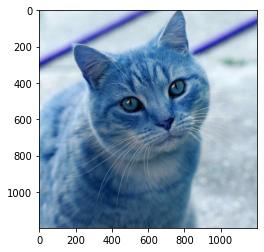

In [5]:
# Read image using OpenCV
#img = <your code goes here>
img = cv2.imread('/content/gdrive/My Drive/cat.jpg') #<your code goes here>

# Display image using Matplotlib
plt.imshow(img)

### Questions 1.1
1. What is the size of the image?
2. How many color channels does it have?
3. Why do the colors look so weird?

**Answer to question 1:**

In [ ]:
print(img.shape)

(1199, 1200, 3)


**Answer to question 2:** Three color channels

**Answer to question 3:** Color channels in OpenCV images are ordered Blue, Green, Red, but matplotlib's ``imshow`` function expects the colors be in the order Red, Green, Blue. So what happens here is that when you call plt.imshow(img), the Blue and Red channels have been switched.

### Tasks 1.2
Run this piece of code:

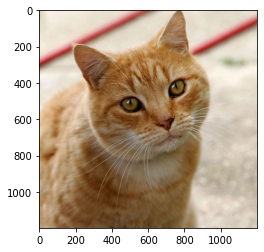

In [6]:
b,g,r = cv2.split(img)
rgb = cv2.merge((r,g,b))
plt.imshow(rgb)

### Questions 1.2
1. What just happened?


**Answer:** We switched the Blue and Red channels to make Matplotlib display the image colors correctly.

### Task 1.3
Let's do some pixel operations:

(Need help? OpenCV images are simply Numpy arrays. Look under indexing in the Numpy tutorial: https://github.com/aivclab/dlcourse/blob/master/Lab1_Tutorial.ipynb)

[214 230 236]


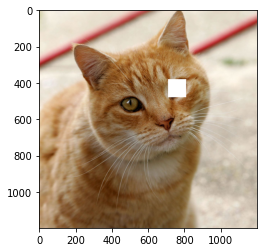

In [7]:
# What is the color [b,g,r] of the pixel at location [100,100]?
#<your code goes here>
print(img[100,100])

# Set the color the pixel at location [100,100] to the value [255,255,255]
#<your code goes here>
img[100,100] = [255,255,255]

# Make the color of all pixels in the region [380:480, 710:810] white
#<your code goes here>
img[380:480, 710:810] = 255

# Display
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### Questions 1.3
1. Where is the origin of the image coordinate system?
2. What is the direction of the first coordinate/axis?
3. What is the direction of the second coordinate/axis?
4. Oh, and what does the function cv2.cvtColor do?

**Answer to question 1:** The origin is in the upper-left corner of the image. 

**Answer to question 2:** The direction of the first axis is top to bottom.

**Answer to question 3:** The direction of the second axis is left to right.

**Answer to question 4:** In this case it converts colorspace from BGR to RGB.

## Task 2
You will learn some basic image processing.

Where to find inspiration:
* https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_basic_ops/py_basic_ops.html#basic-ops
* https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html
* https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html
* https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html
* https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_table_of_contents_contours/py_table_of_contents_contours.html


### Task 2.1
Lets do some simple geometric transformations of the cat image:

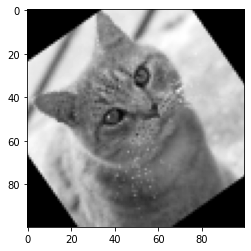

In [8]:
#Reload cat image
img = cv2.imread('/content/gdrive/My Drive/cat.jpg')

# Convert to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Resize img to size 100 by 100
#<your code goes here>
img = cv2.resize(img,(100,100), interpolation = cv2.INTER_CUBIC)

# Now, rotate the resized image 35 degrees counter clockwise
angle = 35
rows,cols = img.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
img = cv2.warpAffine(img,M,(cols,rows))

# Display
plt.imshow(img, cmap='gray')

### Questions 2.1
1. How would you use cv2.resize to scale the image to half the original size?
2. What do you think the matrix M does? Hint: See [here](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html)
3. What happens if you delete cmap='gray' in plt.imshow?

**Answer to 1:** ``img = cv2.resize(img,None,fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)``

**Answer to 2:** M is "some kind of transformation matrix" that transforms the image coordinates in order to rotate the image

**Answer to 3:** The colors look weird... The reason is that matplotlib maps grayscale values into colors using a so-called color map.

### Task 2.2
Let's try another image:

In [9]:
import urllib.request

url = "https://github.com/aivclab/dlcourse/raw/master/data/sudoku.jpg"
urllib.request.urlretrieve(url,'/content/gdrive/My Drive/sudoku.jpg')

# Check that the file is in your Drive
!ls "/content/gdrive/My Drive/sudoku.jpg"

'/content/gdrive/My Drive/sudoku.jpg'


Display the image:

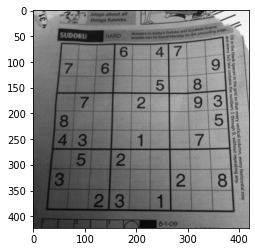

In [10]:
# Load sudoku image
img = cv2.imread('/content/gdrive/My Drive/sudoku.jpg')

# Convert to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display
plt.imshow(img, cmap='gray')

Do some magic!

(<matplotlib.axes._subplots.AxesSubplot at 0x7f878df2fc50>,
 Text(0.5, 1.0, 'Output'))

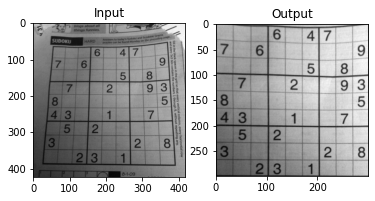

In [11]:
rows,cols = img.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

img_aligned = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Input')
plt.subplot(122),plt.imshow(img_aligned,cmap='gray'),plt.title('Output')

### Questions 2.2
1. Can you figure out how the coordinates ``pts1`` were selected?
2. What does the transform ``warpPerspective`` do?

**Answer to question 1:** They correspond roughly to the four corners of the sudoku plate in the input image:
- [56,65] = upper left corner
- [368,52] = upper right corner
- [28,387] = lower left corner
- [389,390] = lower right corner

*Remark:* Do you notice something strange about these coordinates? Actually the order of the two coordinates is reversed compared to the Numpy standard. So the first coordinate is along the horizontal direction, and the second coordinate is along the vertical direction. This inconsistency between Numpy coordinates and OpenCV coordinates is somewhat confusing...

**Answer to question 2:** The image got warped such that the points pts1 in the Input image were mapped to the points pts2 in the Ouput image. In general, this type of transformation is called a homography or a perspective transformation.

The specific transformation that we have performed here is called "image rectification". In reality the sudoku field is square, but due to perspective effects, the field does not appear to be square in the Input image. However, because the sudoku field is prined on a planar surface (i.e., a newspaper), we can use a perspective transformation to make it appear is if the camera had been placed directly above the sudoku plate. This is only possible, because the newspaper is planar.

Technically, a perspective transform or [homography](https://docs.opencv.org/3.4.1/d9/dab/tutorial_homography.html) is a transformation of points from one plane to another plane, through a common center of projection:

![alt text](https://docs.opencv.org/3.4.1/homography_transformation_example1.jpg)

In this figure, the leftmost plane is our image plane, and the rightmost plane represents the newspaper with the sudoku plate. A perspective transform allows us to rotate the rightmost plane and map whatever is on that plane onto the image plane (throuogh the center of projection). In the case of image rectification the rightmost plane is rotated such that it is parallel with the image plane (not shown in the figure).

### Task 2.3
Suppose, you wanted to detect and recognize the individual numbers from the cells on the sudoku field. A first step towards achieving this could be to

1. make the image binary, such that pixels are either black or white
2. group black pixels into connected clusters (also called connected components)
3. recognize digits by performing some sort of template matching on each component against a database of digits

The first step is called thresholding:

(<matplotlib.axes._subplots.AxesSubplot at 0x7f878de54d68>,
 Text(0.5, 1.0, 'thresh2'))

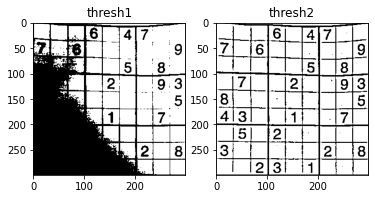

In [12]:
ret,thresh1 = cv2.threshold(img_aligned,100,255,cv2.THRESH_BINARY)
thresh2 = cv2.adaptiveThreshold(img_aligned,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,7)
plt.subplot(121),plt.imshow(thresh1,cmap='gray'),plt.title('thresh1')
plt.subplot(122),plt.imshow(thresh2,cmap='gray'),plt.title('thresh2')

### Questions 2.3
1. Explain how thresh1 is calculated
2. Explain how thresh2 is calculated

**Answer:** Thresholdning is basically the process of turning a grayscale image into a binary image. For thresh1, all pixels in the input image with intensity less than a threshold (100 in this case) are set to zero, and the remaining pixels are set to the maximum value (255 in this case). As you can see, using a global threshold is noot always optimal. A better solution in this case is tooo use a local (i.e., position-dependent) threshold, and this is how thresh2 is calculated. The local threshold is based on the mean pixel intensity within a predefined window size (11 in this case).



### Task 2.4
We can use OpenCV findContours to find alle the connected components in a binary image. The algorithm looks for connected white pixels that are connected, so we first have to invert the binary image:

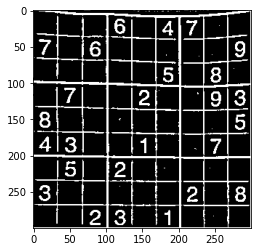

In [13]:
thresh2_inv = cv2.bitwise_not(thresh2)
plt.imshow(thresh2_inv,cmap='gray')

Next, let's run findContours and look at the output:

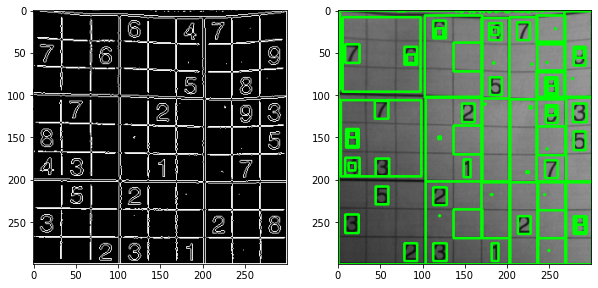

In [17]:
contours, hierarchy = cv2.findContours(thresh2_inv,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

drawing_contours = np.zeros((img_aligned.shape[0],img_aligned.shape[1],3),dtype=np.uint8)
drawing_contours = cv2.drawContours(drawing_contours, contours, -1, (255,255,255), 1)

drawing_boxes = cv2.cvtColor(img_aligned,cv2.COLOR_GRAY2BGR)
for cnt in contours:
  x,y,w,h = cv2.boundingRect(cnt)
  drawing_boxes = cv2.rectangle(drawing_boxes,(x,y),(x+w,y+h),(0,255,0),2)

plt.figure(figsize=(10,10))
plt.subplot(121); plt.imshow(drawing_contours,cmap='gray')
plt.subplot(122); plt.imshow(drawing_boxes,cmap='gray')

### Questions 2.4
``contours`` is a Python list of all the contours in the image.
1. How many contours are there?

**Answer:** 98

``contours`` is a list of lists, where each entry of the outer most level corresponds to a whole contour, and the list at the inner most level contains the (x,y) coordinates of the contour points:

Number of contours: 98
Size of first contour: (44, 1, 2)


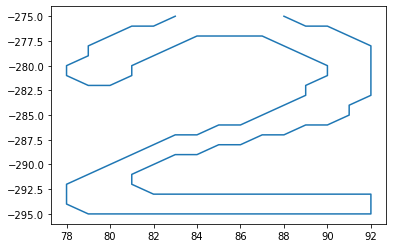

In [18]:
print("Number of contours: " + str(len(contours)))
print("Size of first contour: " + str(contours[0].shape))
plt.plot(contours[0][:,0,0],-contours[0][:,0,1])

### Task 2.5
Based on the output of findContours, see if you can generate a new image, containing just the numbers. You should remove the gridlines of the sudoku field, as well as noise.

**Solution**

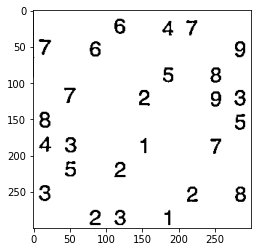

In [20]:
# Creat empty image
img_just_numbers = np.ones(thresh2.shape,dtype=np.uint8) * 255

# Loop over contours
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)

    # Calculate area of bounding box
    area = w*h
  
    # Copy if area of bounding box is below 400 and above 100
    if area > 100 and area < 400:
        img_just_numbers[y:y+h, x:x+w] = thresh2[y:y+h, x:x+w]

plt.imshow(img_just_numbers,cmap='gray')

In summary, we have
- Rectified the sudoku plate to eliminate perspective effects
- Performed adaptive thresholding to separate the black grid lines and black digits from the white background
- Performed connected component analysis and filtering based on the area to isolate just the digits

The final step would be to recognize the digits, which is fairly easy in this case, assuming that they are always printed using the same font. We could simply compare all the detected digits against "templates" for all the digits 0, 1, ..., 9.

## Task 3
You will learn about image gradients and smoothing.

Where to find inspiration:
* https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_gradients/py_gradients.html
* https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html
* https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html


Let's continue working on the sudoku image:

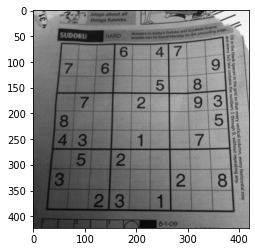

In [21]:
# Load sudoku image
img = cv2.imread('/content/gdrive/My Drive/sudoku.jpg')

# Convert to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display
plt.imshow(img, cmap='gray')

### Task 3.1
Recall that in vector calculus, the gradient is a multi-variable generalization of the derivative. Thinking of an image as a 2D function, the gradient at each position (pixel) indicates how much the intensity varies along the X- and Y-direction.

A simple way to approximate the derivate along X and Y is to simply take pixel differences:

(<matplotlib.image.AxesImage at 0x7f878dfc5b38>,
 Text(0.5, 1.0, 'Iy: Derivate along Y'))

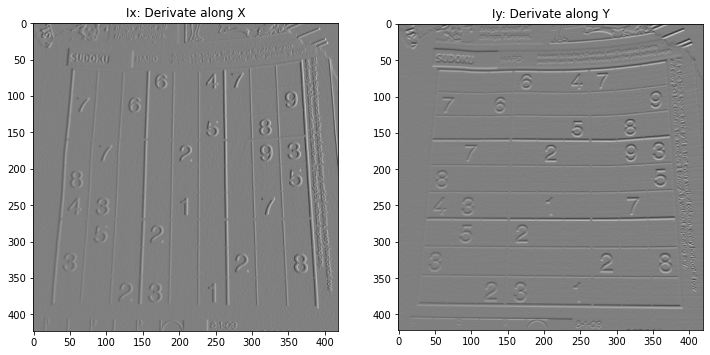

In [22]:
# First convert to float and normalize intensities to range 0.0 to 1.0
img_float = img.astype(np.float32) / 255.

# Approximate derivate along X
Ix = np.diff(img_float, axis=1)

# Approximate derivate along Y
Iy = np.diff(img_float, axis=0)

plt.figure(figsize=(12,12))
plt.subplot(121);
plt.imshow(Ix,cmap='gray',vmin=-0.5,vmax=0.5), plt.title('Ix: Derivate along X')
plt.subplot(122);
plt.imshow(Iy,cmap='gray',vmin=-0.5,vmax=0.5), plt.title('Iy: Derivate along Y')

Plot image intensities (img_float) and derivate (Ix) along row 200.

Also, display Ix again but this time with amplified intensities (using vmin and vmax).

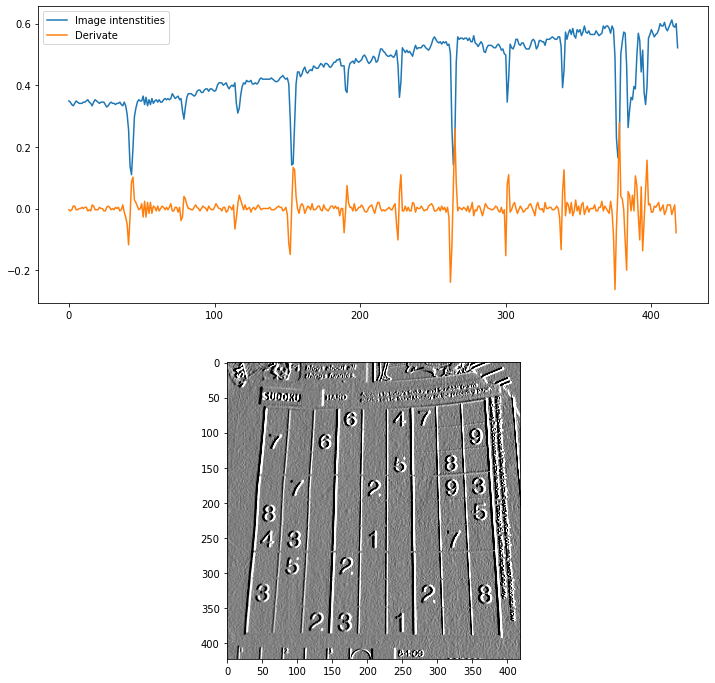

In [23]:
plt.figure(figsize=(12,12))
plt.subplot(211); plt.plot(img_float[200,:]); plt.plot(Ix[200,:]), plt.legend(('Image intenstities','Derivate'))
plt.subplot(212); plt.imshow(Ix,cmap='gray',vmin=-0.05,vmax=0.05)

### Questions 3.1
1. Explain what you see in the two images above (Ix and Iy)?
2. What is the difference between the two images?
3. Explain what you see in the plot of Ix along row 200 and amplified Ix image? Why is the image so noisy?

**Answers:**
1. The two images are just the pixel differences along X and Y. In mathematical terms the output intensity location (x,y) is simply Ix(x,y) = I(x+1,y) - I(x,y). Derivatives can be both positive and negative, shown as bright and dark intensities, respectively.
2. Ix is the derivative along X and is approximatley zero everywhere, except when the intensity changes along the X direction. Same goes for Iy, which is the derivative along Y.
3. The pixel difference is a poor estimator of the derivative, and it is very sensitive to noise.

### Task 3.2
Let's try to smoothen the input image and then recalculate the gradients:


(<matplotlib.image.AxesImage at 0x7f878d883940>,
 Text(0.5, 1.0, 'Iy: Derivate along Y'))

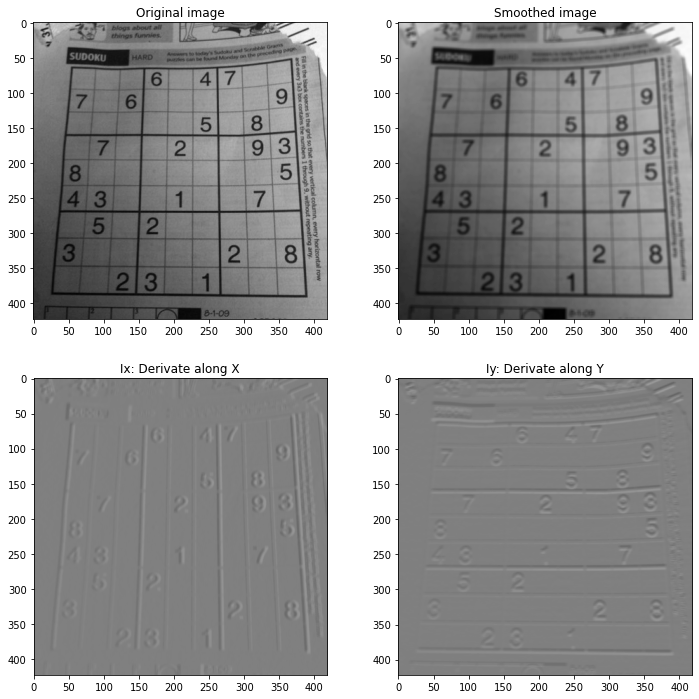

In [24]:
kernel = np.ones((5,5),np.float32)/25
img_float_smoothed = cv2.filter2D(img_float,-1,kernel)

# Approximate derivate along X
Ix = np.diff(img_float_smoothed, axis=1)

# Approximate derivate along Y
Iy = np.diff(img_float_smoothed, axis=0)

plt.figure(figsize=(12,12))
plt.subplot(221);
plt.imshow(img_float,cmap='gray'), plt.title('Original image')
plt.subplot(222);
plt.imshow(img_float_smoothed,cmap='gray'), plt.title('Smoothed image')
plt.subplot(223);
plt.imshow(Ix,cmap='gray',vmin=-0.5,vmax=0.5), plt.title('Ix: Derivate along X')
plt.subplot(224);
plt.imshow(Iy,cmap='gray',vmin=-0.5,vmax=0.5), plt.title('Iy: Derivate along Y')

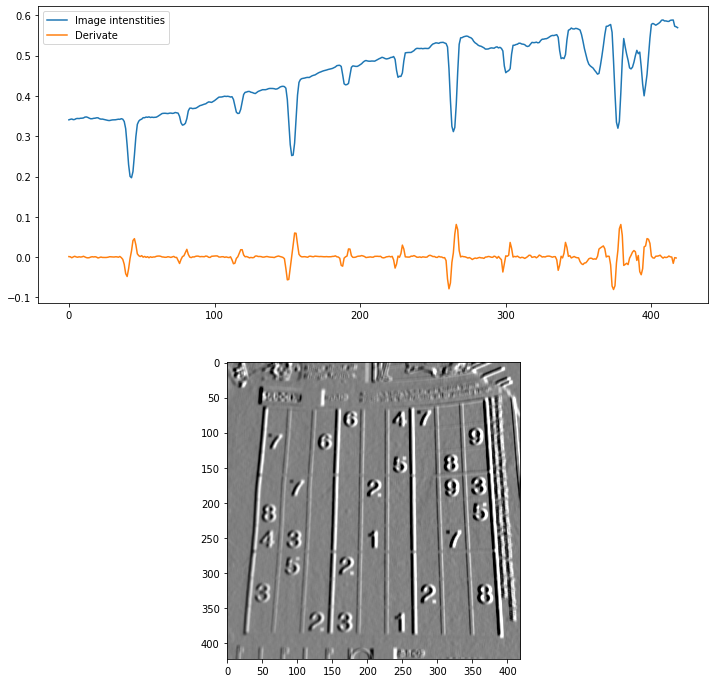

In [25]:
plt.figure(figsize=(12,12))
plt.subplot(211); plt.plot(img_float_smoothed[200,:]); plt.plot(Ix[200,:]), plt.legend(('Image intenstities','Derivate'))
plt.subplot(212); plt.imshow(Ix,cmap='gray',vmin=-0.05,vmax=0.05)

Notice any difference?

### Questions 3.2
1. See if you can figure out how filtering works (see [here](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html))
2. Why does the filtering smoothen the image?
3. Can you figure out a way to calculate the image gradients using filtering? (Hint: You need to design a filter on your own!)
4. Can you calculate an image that displays the magnitude of the gradient at each pixel location?

**Answers:**
1. Filtering is based on convoolution, which is a type of mathematical operation. It will be important to understand convolution neural networks.
2. Because pixel intensities are averaged locally.
3. Its quite simple really:

(<matplotlib.image.AxesImage at 0x7f878d6d32e8>,
 Text(0.5, 1.0, 'Iy: Derivate along Y'))

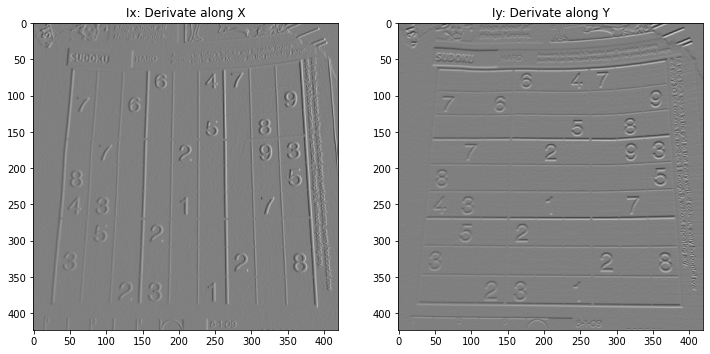

In [26]:
# This is a 3x3 filter with zeros everywhere, except two places (two pixels that we need to subtract from each other to calculate the pixel difference)
kernel_x = np.array([[0, 0, 0], [0, -1, 1], [0, 0, 0]], np.float32)
Ix = cv2.filter2D(img_float,-1,kernel_x)

# Again, this is a 3x3 filter with zeros everywhere, except two places (two pixels that we need to subtract from eachother to calculate the pixel difference)
kernel_y = np.array([[0, 0, 0], [0, -1, 0], [0, 1, 0]], np.float32)
Iy = cv2.filter2D(img_float,-1,kernel_y)

plt.figure(figsize=(12,12))
plt.subplot(121);
plt.imshow(Ix,cmap='gray',vmin=-0.5,vmax=0.5), plt.title('Ix: Derivate along X')
plt.subplot(122);
plt.imshow(Iy,cmap='gray',vmin=-0.5,vmax=0.5), plt.title('Iy: Derivate along Y')

The cool thing is that we can combine the smoothing and derivative calculationg into a single filter for each direction. There are many different ways to do this. The implementations below are called [Sobel filters](https://en.wikipedia.org/wiki/Sobel_operator):

(<matplotlib.image.AxesImage at 0x7f878db0b320>,
 Text(0.5, 1.0, 'Iy: Derivate along Y'))

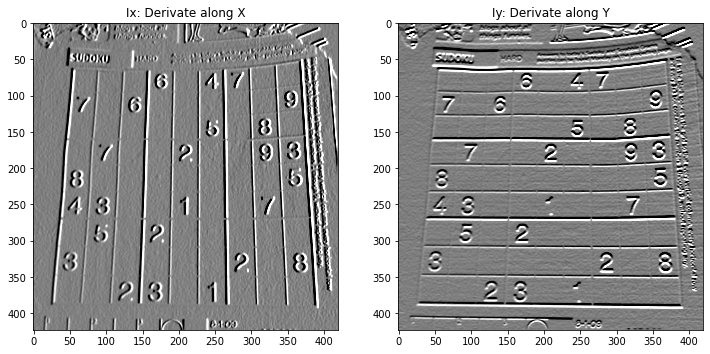

In [27]:
# Sobel along X: Combines Gaussian smoothing + difference calculation
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
Ix = cv2.filter2D(img_float,-1,sobel_x)

# Sobel along Y: Combines Gaussian smoothing + difference calculation
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], np.float32)
Iy = cv2.filter2D(img_float,-1,sobel_y)

plt.figure(figsize=(12,12))
plt.subplot(121);
plt.imshow(Ix,cmap='gray',vmin=-0.5,vmax=0.5), plt.title('Ix: Derivate along X')
plt.subplot(122);
plt.imshow(Iy,cmap='gray',vmin=-0.5,vmax=0.5), plt.title('Iy: Derivate along Y')

**Answers (continued):**
4. We just need to calculate the norm of the vecot (Ix,Iy) at each location:

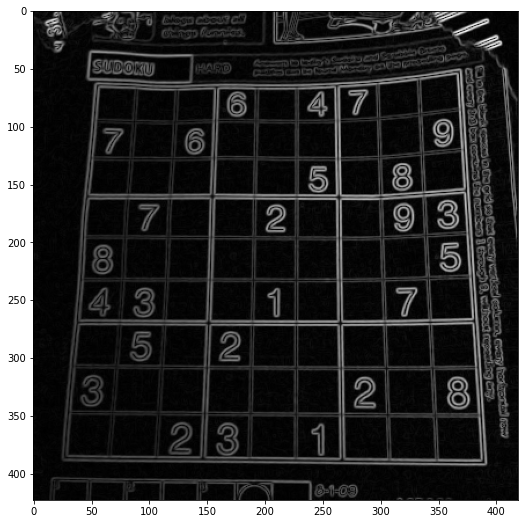

In [28]:
magnitude = np.sqrt(np.power(Ix,2) + np.power(Iy,2))
plt.figure(figsize=(9,9))
plt.imshow(magnitude,cmap='gray')

The gradient magnitude image can be used to find edges in an image. A widely used algorithm for edge detection is [Canny edge detection](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html):

Text(0.5, 1.0, 'Edge Image')

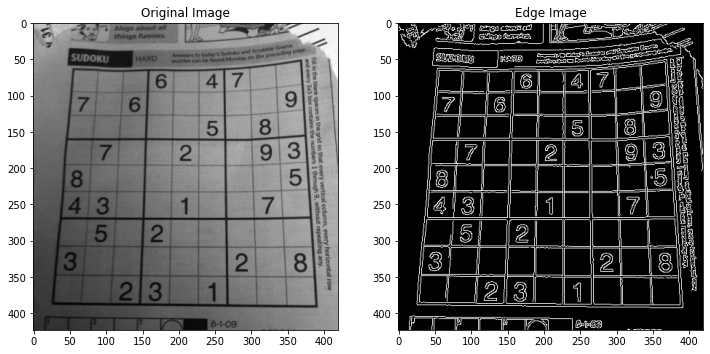

In [29]:
plt.figure(figsize=(12,12))
edges = cv2.Canny(img,50,100)
plt.subplot(121),plt.imshow(img,cmap = 'gray');plt.title('Original Image')
plt.subplot(122),plt.imshow(edges,cmap = 'gray');plt.title('Edge Image')

## Task 4
You will learn about template matching.

Where to find inspiration:
* https://docs.opencv.org/master/d4/dc6/tutorial_py_template_matching.html

### Task 4.1
Inspect the cat image and create a template by cropping out an image region corresponding to the cat's left eye (your right-hand side). The eye is roughly at ``[380:480, 710:810]``.

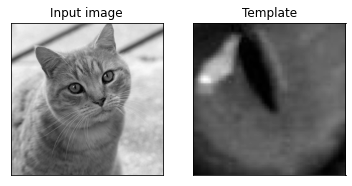

In [30]:
# Load cat image
bgr = cv2.imread('/content/gdrive/My Drive/cat.jpg')

# Convert to grayscale
img = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)

# Display
plt.imshow(img, cmap='gray')

# Create template
# template = <Your code goes here>
template = img[400:460, 730:790]

# Display the image and the template
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Input image'), plt.xticks([]), plt.yticks([])
plt.subplot(122);plt.imshow(template, cmap='gray')
plt.title('Template'), plt.xticks([]), plt.yticks([])
plt.show()

### Task 4.2
Your task is to detect the other eye using template matching (i.e., detect cat's right eye by using the left eye as a kind of "search template"). Use this as inspiration:
https://docs.opencv.org/master/d4/dc6/tutorial_py_template_matching.html

Use the TM_CCOEFF_NORMED distance metric.

You may find the ``where`` function af numpy useful: https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html

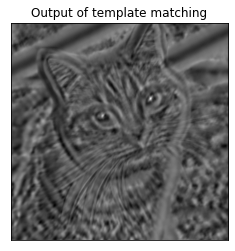

In [31]:
# Apply template Matching
res = cv2.matchTemplate(img,template,cv2.TM_CCOEFF_NORMED)

# Show result
plt.imshow(res,cmap = 'gray')
plt.title('Output of template matching')
plt.xticks([]);
plt.yticks([]);

The output of matchTemplate is an image, where the intensity reflects the similarity between the template and the underlying portion of the cat image.

The output has high values near both eyes (as expected), because the template looks like an eye.

The next step is to locate the eyes. As a first step, we could threshold the output image and pick only pixels, where the response is higher than a certain threshold.

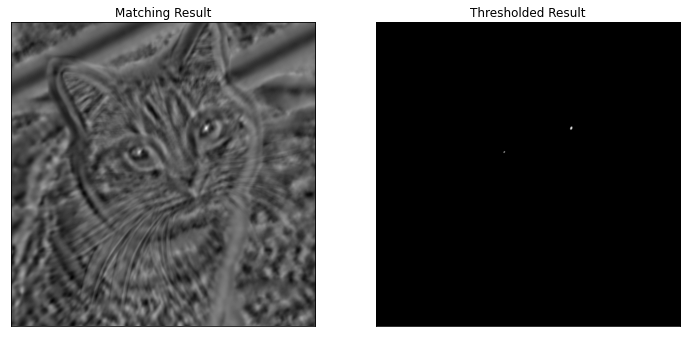

In [32]:
# Threshold result
ix = np.where(res>0.6) # Find all indexes where intensity is above threshold
res_thresh = np.zeros(res.shape) # New empty image
res_thresh[ix] = res[ix] # Copy pixel values of selected indexes

plt.figure(figsize=(12,12))
plt.subplot(121),plt.imshow(res*10,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(res_thresh,cmap = 'gray')
plt.title('Thresholded Result')
plt.xticks([]);
plt.yticks([]);

Now, if you zoom in on one of the eyes, you'll see that there are many pixels above the threshold.

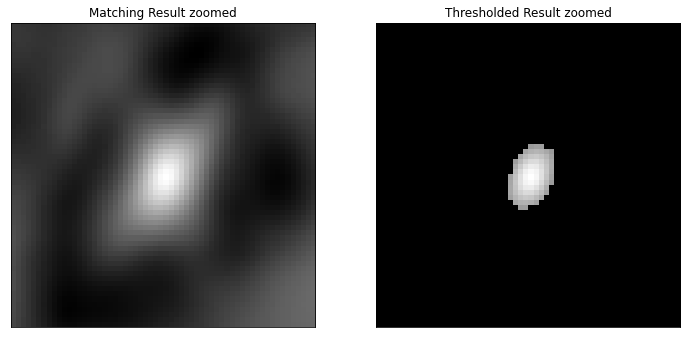

In [33]:
w_half, h_half = [int(k/2) for k in template.shape[::-1]]
res_zoom = res[400-h_half:460-h_half, 730-w_half:790-w_half]
res_thresh_zoom = res_thresh[400-h_half:460-h_half, 730-w_half:790-w_half]
plt.figure(figsize=(12,12))
plt.subplot(121),plt.imshow(res_zoom,cmap = 'gray')
plt.title('Matching Result zoomed'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(res_thresh_zoom,cmap = 'gray')
plt.title('Thresholded Result zoomed')
plt.xticks([]);
plt.yticks([]);

This is not exactly what we want. What we want is to identify a single pixel/located corresponding to each eye.

All pixels above the threshold are potential eye candidates. So we could just pick the one pixel that gives the highest response. For practical reasons this is not exactly how we do it. Instead, we look for pixels that are local maxima, i.e., where the intensity is higher than all of the surrounding 8 pixels. This step is called *non-maximum-suppression*:

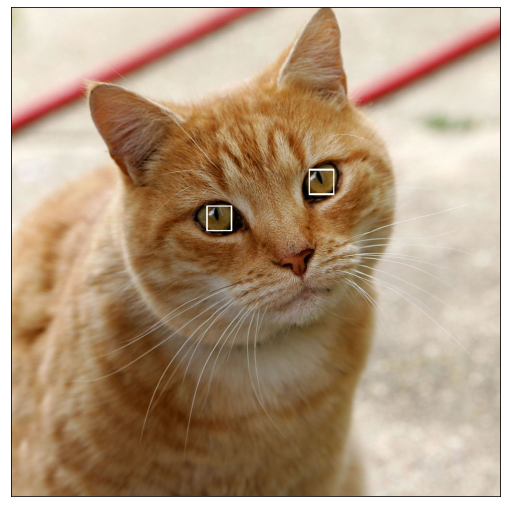

In [34]:
w, h = template.shape[::-1]

# Find local maxima (non-maximum suppresion)
rows = ix[0]
cols = ix[1]
for i in range(len(rows)):
    r = rows[i]
    c = cols[i]
    is_local_max = True
  
    # Ignore border pixels
    if r > 0 and r < img.shape[0] and c > 0 and c < img.shape[1]:
    
        # Loop through neighbour pixels
        for x in range(-1,2):
            for y in range(-1,2):
        
                # Ignore center pixel (not a neighbour), and set is_local_max to False 
                # if current neighbour is higher than center pixel
                if x != 0 and y != 0 and res[r+x,c+y] > res[r,c]:
                    is_local_max = False
    else:
        is_local_max = False
  
    # If pixel is a local maximum, plot a rectangle in the original color image
    if is_local_max:
        cv2.rectangle(bgr,(c,r), (c+w,r+h), (255,255,255), 2)
    
plt.figure(figsize=(9,9))
plt.imshow(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])

plt.show()

## Optional tasks
If you have more time, feel free to look into [feature detection and matching](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_table_of_contents_feature2d/py_table_of_contents_feature2d.html):
* https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_meaning/py_features_meaning.html#features-meaning
* https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html#harris-corners
* https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html#matcher
* https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_feature_homography/py_feature_homography.html#feature-homography